# Graph Automation

In this notebook a simple automation to graph many different time series will be constructed step by step.

The first part of the process will introduce reading files as well as sanity checking them, and automatically creating files for the purpose of later graphing them. The same technique for creating the files will then be used to graph those files, showing how scripts can be versatile if left generic enough.

In [1]:
# This script creates a file for graphing.
# the file will be a time series csv, with and x, y, and a label component.

# We create some random numbers to fill the y column:
sample_size <- 1000
sample_range <- 1:100

y <- sample(sample_range, sample_size, rep=TRUE)

# As this is a time series we designate x to be a column that is 1 to the sample size:
x <- 1:sample_size

# We will create a label for this dataset:
name <- 'My_New_Time_Series'

# We put this together to create the data frame that will become our csv file:
df <- data.frame(name, x, y)
# and save to csv, we paste the label and .csv together to concatenate them together for the files name:
write.csv(df, paste(name, '.csv'), row.names=TRUE)


Now that we have some data we can write a script that will graph it!


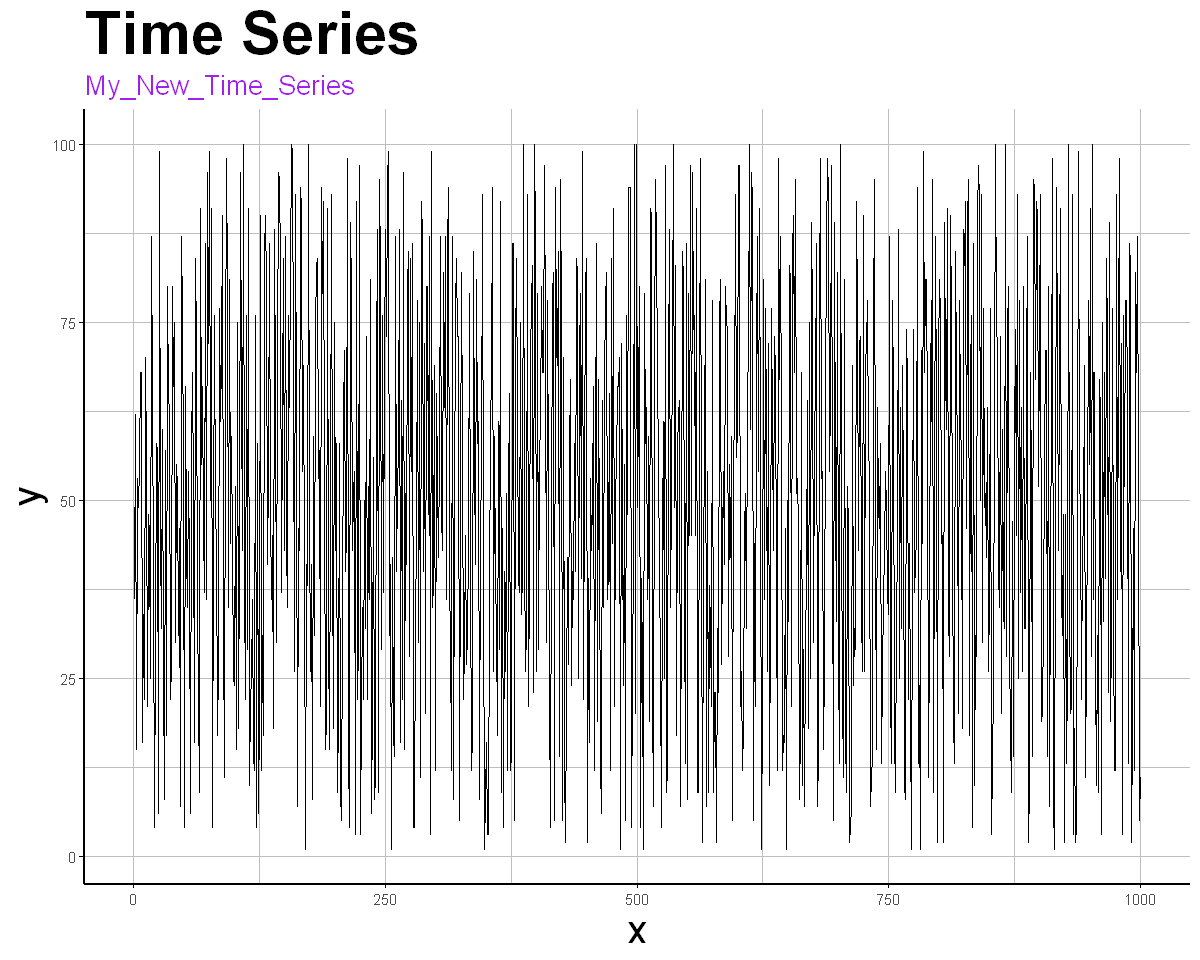

In [2]:
# First we will enable the plotting library using the command:
library(ggplot2)

# We will also read in our file:
label <- 'My_New_Time_Series'
df <- read.csv(paste(name, '.csv'))

# Create the plot
new_plot <- ggplot(df, mapping=aes(x, y)) + geom_line()
#new_plot <- new_plot + stat_function(fun = time_series, color="purple", size=1.25) + xlim(0,1)

# axes labels:
new_plot <- new_plot + xlab('x') + ylab('y')

# we can add a caption, subtitle etc using labs:
new_plot <- new_plot + labs(
                                xlab='x',
                                ylab='y',
                                title='Time Series',
                                subtitle=label
                                )

# We can create a theme, for reference:
# https://ggplot2.tidyverse.org/reference/theme.html

new_plot <- new_plot + theme(
                                plot.title = element_text(size = 36, face = "bold"),
                                plot.subtitle = element_text( size = 16, color = "purple"),
                                axis.title.y = element_text(size = 24),
                                axis.title.x = element_text(size = 24),
                                panel.background = element_rect(fill = "white"),
                                panel.grid = element_line(color = "grey"),
                                axis.line = element_line(size=0.75),
                                axis.ticks = element_line(color="black")
                              )

#We can also change the height and width in the options via:
# Not that this is simply a command for Jupyter Notebooks and not native to R
options(repr.plot.width=10, repr.plot.height=8)

# finally plot it by calling it.
new_plot

#  This resets the options back to default:
options(repr.plot.width=7, repr.plot.height=7)

To automate this we will want to create a function that can be called every time we want to do something. A good rule of thumb is that no code should be repeated. In some cases we can even use R to generate the code we need without writing it.

We will have to parametise some elements but we will begin with a very simple script that creates multiple csv files then graphs them with minimal parameters. Below we define the two functions that achieve this, one for csv creation, and one for graphing.


Note that there are standardised ways to style your code. This can be considered a standardisation of you code, it will make it easier for you to read as well as others. This is especially important if you go for long periods without reading the script. The styling code used from here on will be Googles:

https://web.stanford.edu/class/cs109l/unrestricted/resources/google-style.html

In [3]:
# For this function we leave some arguments with a default value by giving them in the functions declaration as an argument:
# Variables with defaults do not need them to be given values when they are called, as these values will not change regularly.

csv.gen <- function(name, sample.size, sample.range, file.name='time_series.csv', append=TRUE){
  # This function creates a random time series and saves it to a csv file.
  # 
  # Args:
  #  label: The data label for a series, used to discern between different datasets.
  #  sample.size: The length of the time series, a range from 1 to sample.size.
  #  sample.range: The range at which values can be, from 1 to sample.range.
  #  file.name: The name of the file to be saved.
  #  append: A boolean statement, if true then data will be appended, otherwise the file is overwritten.
  #
  # Returns:
  # None
  
  y <- sample(sample.range, sample.size, rep=TRUE)
  x <- 1:sample.size
  df <- data.frame(name, x, y)
  
  # For this argument if the append statement is true then we will add more data to the file.
  # Note that the if statement was put in after it was found that the headers would be appended as new rows, which
  # needed to be addressed separately.
  if(append){
    write.table(df, file.name, row.names=FALSE, append=append, sep=',', col.names=FALSE)  
  }
  else{
      write.csv(df, file.name, row.names=FALSE)
  }
    
}

In [5]:
library(ggplot2)

time.series.graph <- function(df, input.lab, input.theme, input.mapping, input.geom){
  # This function graphs a time series
  # Create the plot
  new_plot <- ggplot(df, mapping=input.mapping) + input.geom + input.labs + input.theme
  
  # We return the graph as an output of the function:
  return(new_plot)
}

Now that we have functions that we can reuse, we can call them in a loop. Below we use a loop to iterate the creation and subsequent graphing of new csv files.

In [6]:
# We first generate a csv, below we do it for 10 random labels of random size using a for loop:

# We turn off warnings for this script as it warns you if you append to a file, which we are doing intentionally.
options(warn = -1)

# For the first we want to not append, this will overwrite any file that is currently present so that we can always start
# from scractch.

name <- 1
sample.size <- sample.int(1000, 1)
sample.range <- sample.int(100, 1)
csv.gen(name, sample.size, sample.range, append=FALSE)
print(paste('Generating data: ', name, ' of 10, size of ', sample.size, ' and range of ', sample.range))

# We do not include this in the loop otherwise we will need an if statement to check if it is the first everytime.
# This will slow the loop down, and although it is an infiticimal amount of time that is lost, it will add up if you need to
# generate several million graphs.

# we start from 2 instead of 1 as the first is already done.

for (name in 2:10){
    # the variable label will take the values of 1 to 3 for step in the loop:
    
    # First we create some random variables:
    sample.size <- sample.int(1000, 1)
    sample.range <- sample.int(100, 1)
    
    # We output something to know it is working correctly:
    print(paste('Generating data: ', name, ' of 10, size of ', sample.size, ' and range of ', sample.range))
    
    csv.gen(name, sample.size, sample.range)
}

# Remember to always turn warnings back on:
options(warn = 1)


[1] "Generating data:  1  of 10, size of  167  and range of  74"
[1] "Generating data:  2  of 10, size of  745  and range of  24"
[1] "Generating data:  3  of 10, size of  844  and range of  55"
[1] "Generating data:  4  of 10, size of  680  and range of  40"
[1] "Generating data:  5  of 10, size of  230  and range of  12"
[1] "Generating data:  6  of 10, size of  60  and range of  34"
[1] "Generating data:  7  of 10, size of  158  and range of  52"
[1] "Generating data:  8  of 10, size of  512  and range of  15"
[1] "Generating data:  9  of 10, size of  735  and range of  25"
[1] "Generating data:  10  of 10, size of  487  and range of  37"


Note that the function above could be made nicer, a function could be written to reduce the code. We could automate the creation of randomised csv files in a function so that we do not need to write the code twice. It can seem strange to put the effort in so early on but you never know when you will need to repeat these lines of code again. It also presents the code in an easier to read format, where the function can be searched for and has an easily identifiable beginning and end.

Below we read the created csv and graph it:

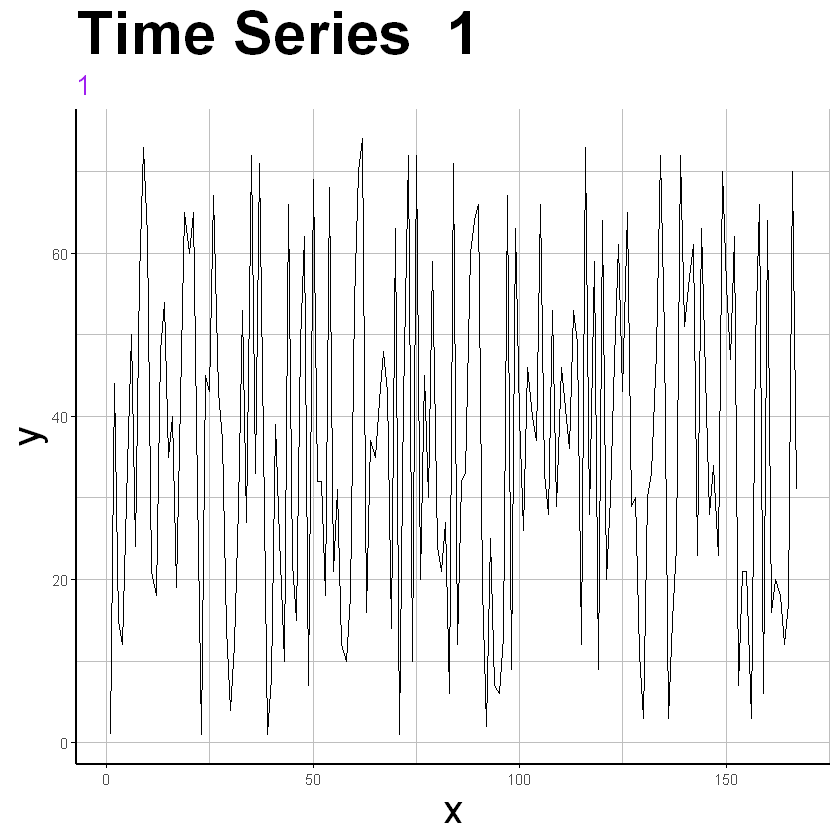

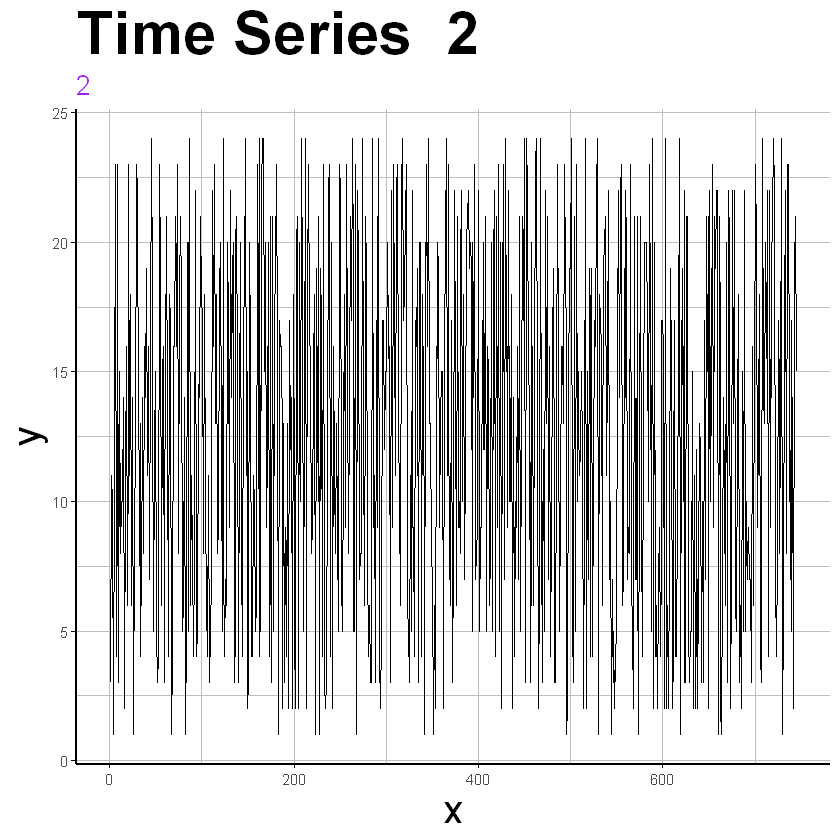

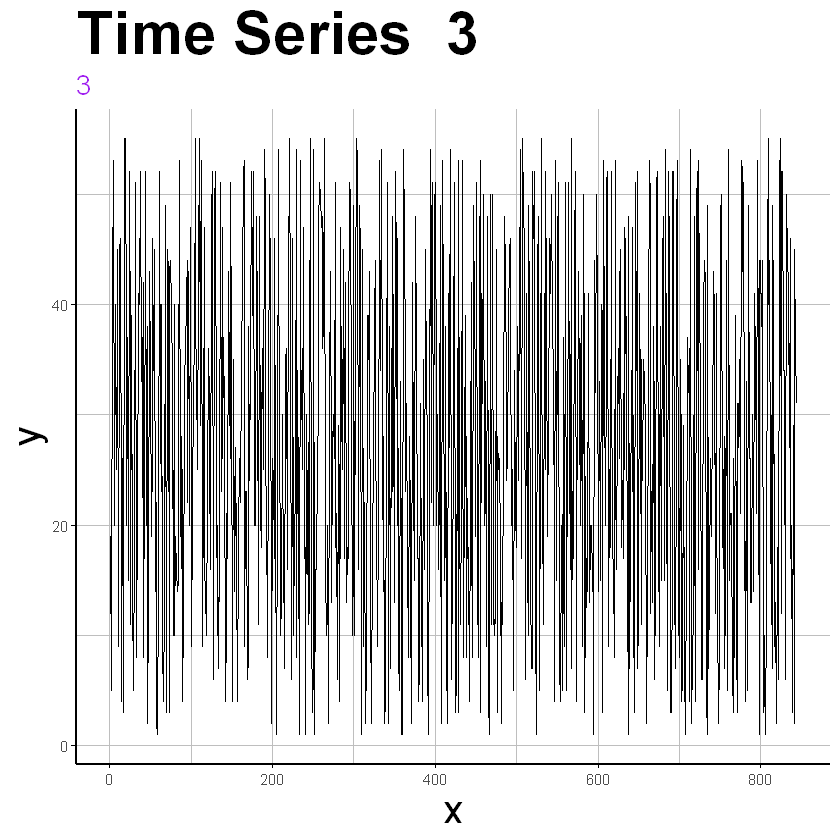

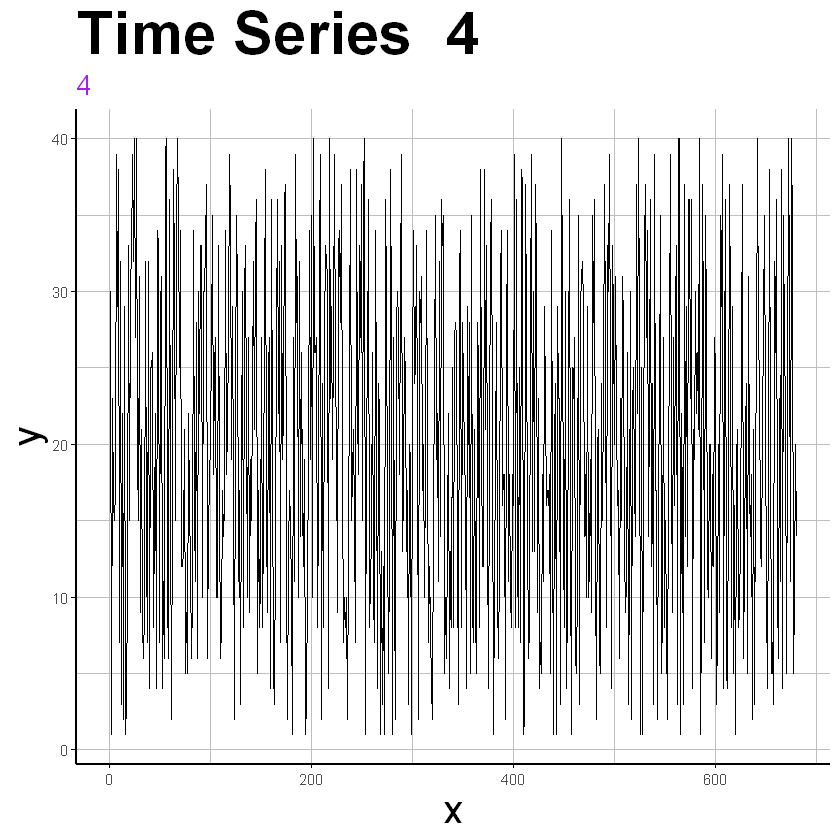

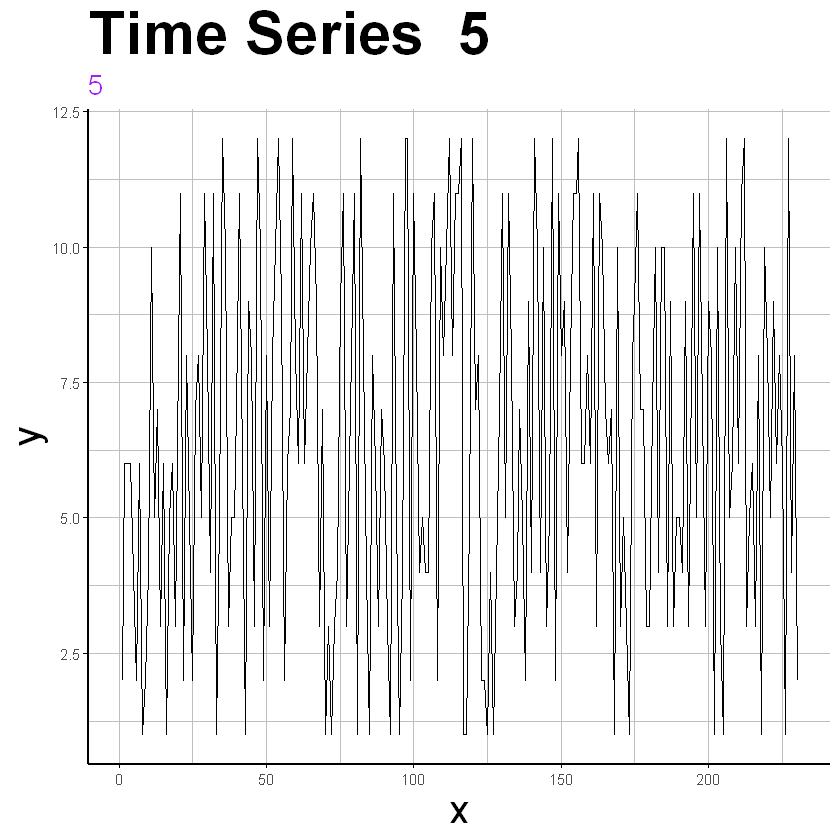

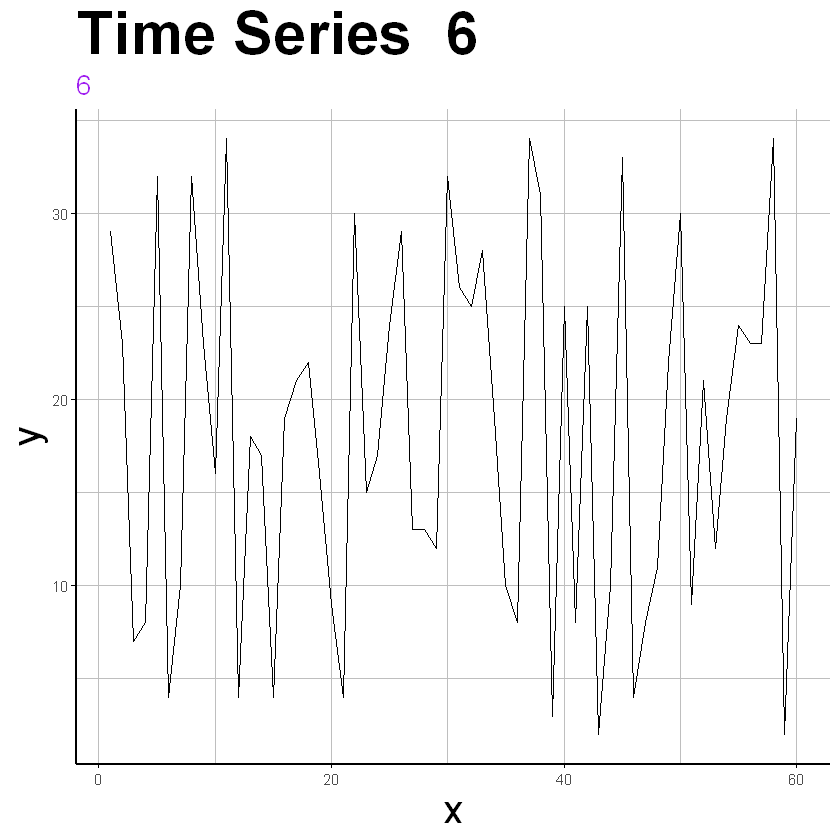

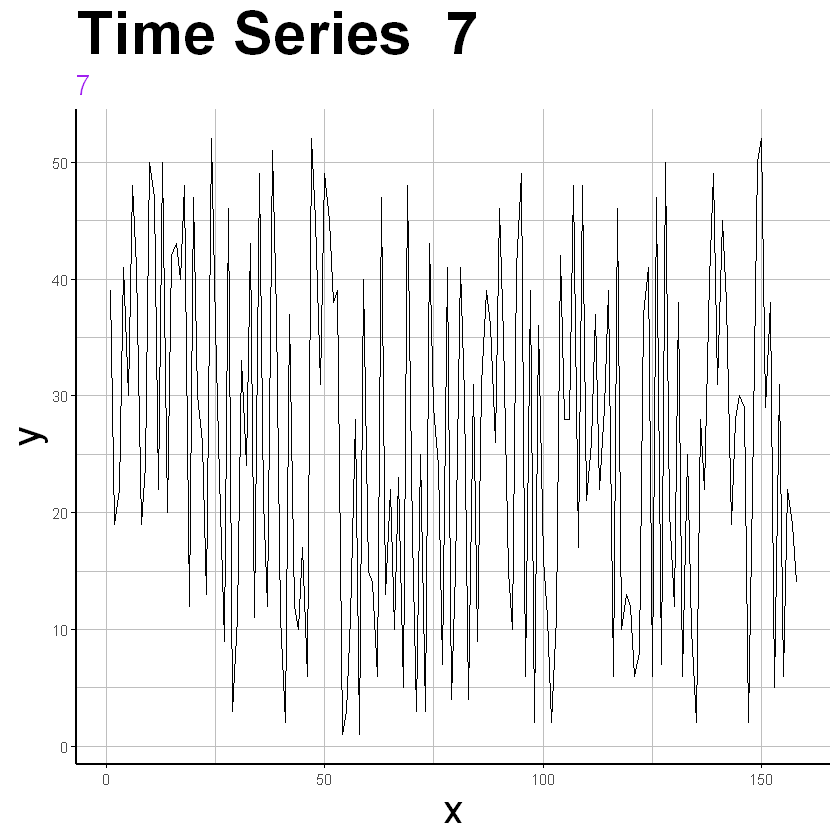

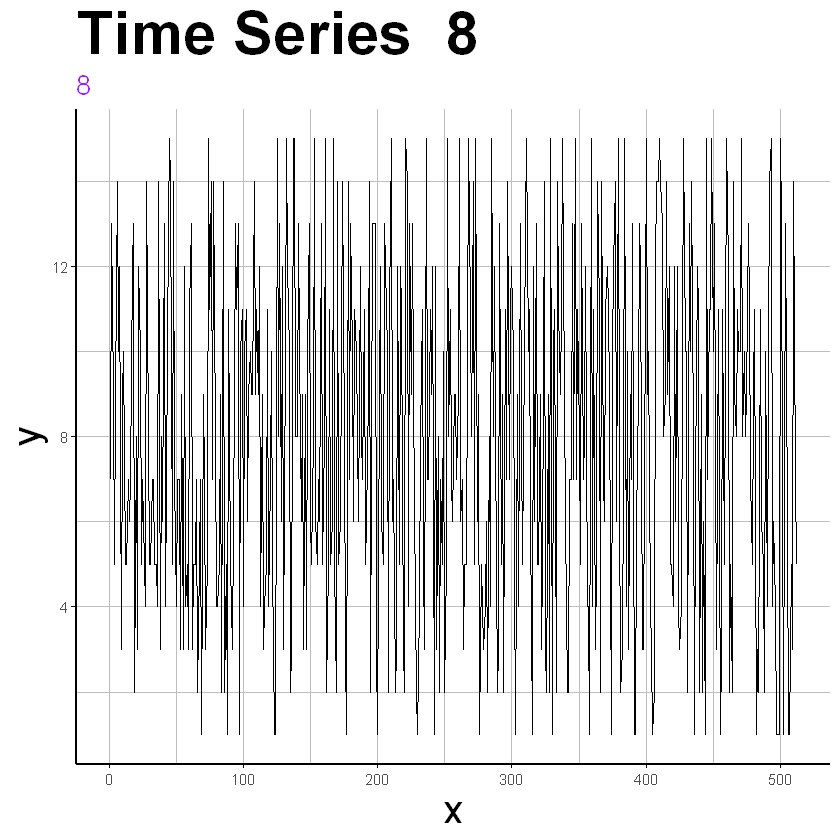

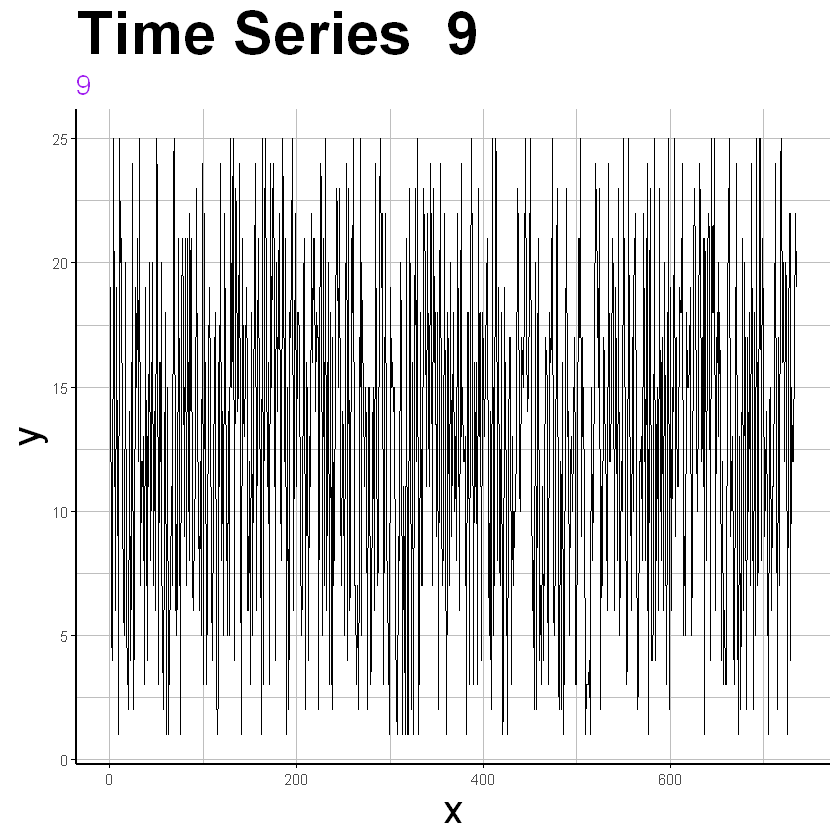

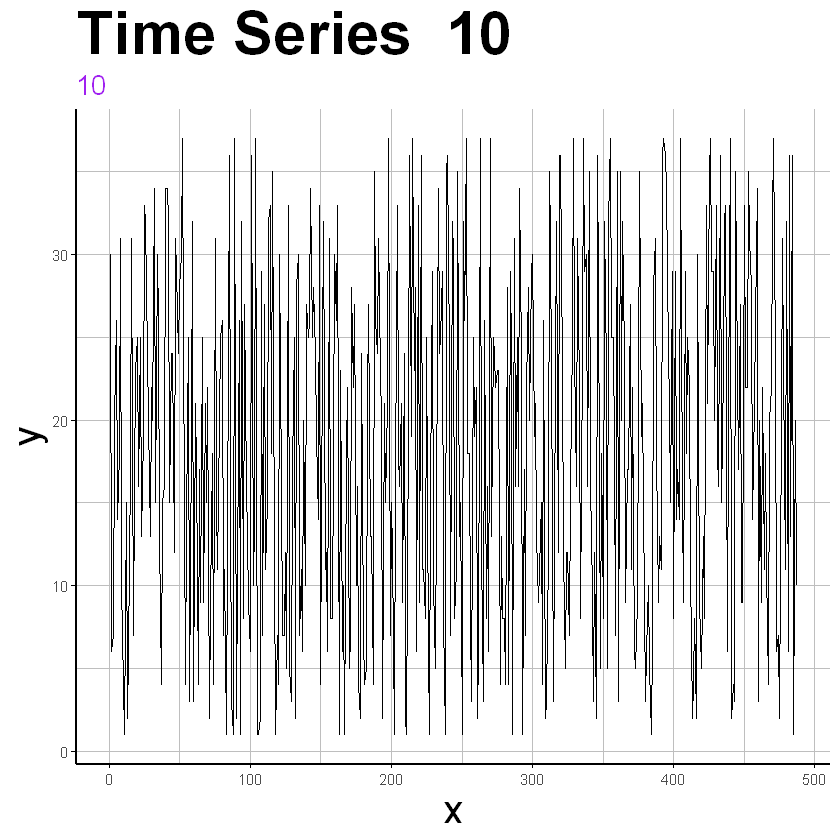

In [7]:
# We define the parameters:

# We create a list to store the graphs and then plot them all together as a subplot at the end:
graphs <- list()

df <- read.csv('time_series.csv', row.names=NULL)

# Note here that the below parameters are actually other functions. R is a functional language and this is where it thrives.
# You can even alter the csv function to parse an input function that will inform it what to do with the csv after it is created.
input.mapping <- aes(x, y, group=1)

input.geom <- geom_line()

input.theme <- theme(
  plot.title = element_text(size = 36, face = "bold"),
  plot.subtitle = element_text( size = 16, color = "purple"),
  axis.title.y = element_text(size = 24),
  axis.title.x = element_text(size = 24),
  panel.background = element_rect(fill = "white"),
  panel.grid = element_line(color = "grey"),
  axis.line = element_line(size=0.75),
  axis.ticks = element_line(color="black")
)

# We iterate over the names in the csv:
for (name in unique(df$name)){
  # Each time we iterate we want to change a couple of values like the labels:
  input.labs <- labs(
    xlab='x',
    ylab='y',
    title=paste('Time Series ', name),
    subtitle=name
  )

  # We also want to slice the data in the csv so that there is a new graph for every different name:
  sliced.df <- df[df$name==name,]

  # Now we call the graph functio nwe defined earlier:
  graph <- time.series.graph(sliced.df, input.lab, input.theme, input.mapping, input.geom)
  print(graph)
}

From here we can make many customisations to the script. The next steps are to define the problem, does the format change automatically? do we need to change graphs if they are under or over certain values?

These can all be addressed, however with each new customisation the script become more complicated. To alliviate these complications it best to partition different customisations from each other. A further example of how to structure a full program with some real data is present in the 'example' folder.